In [ ]:
# Install necessary libraries
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# Define the maze
maze = [
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
]

# Start and end points
start, end = (0, 0), (len(maze)-1, len(maze[0])-1)

In [ ]:
# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_direction", random.choice, ['U', 'D', 'L', 'R'])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_direction, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evaluate(individual):
    x, y = start
    for move in individual:
        # Move up, down, left, or right while checking boundaries
        if move == 'U': y = max(0, y - 1)
        elif move == 'D': y = min(len(maze) - 1, y + 1)
        elif move == 'L': x = max(0, x - 1)
        elif move == 'R': x = min(len(maze[0]) - 1, x + 1)

        # Check if the current position is the end goal
        if (x, y) == end:
            return (0,)  # Perfect score since we reached the end

        # Check if the current position is a wall
        if maze[y][x] == 1:
            break

    # Return the Manhattan distance to the end point as the score
    return (abs(end[0] - x) + abs(end[1] - y),)

In [ ]:
def custom_mutate(individual, indpb=0.2):
    directions = ['U', 'D', 'L', 'R']
    for i in range(len(individual)):
        if random.random() < indpb:
            # Exclude the current direction to ensure mutation changes the gene
            possible_directions = [d for d in directions if d != individual[i]]
            individual[i] = random.choice(possible_directions)
    return individual,

In [ ]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", custom_mutate, indpb=0.2)

In [ ]:
# Function to visualize the maze and path
def plot_path(individual):
    x, y = start
    plt.plot(x, y, "go")  # start point
    for move in individual:
        # Attempt the move
        next_x, next_y = x, y
        if move == 'U': next_y = max(0, y - 1)
        elif move == 'D': next_y = min(len(maze) - 1, y + 1)
        elif move == 'L': next_x = max(0, x - 1)
        elif move == 'R': next_x = min(len(maze[0]) - 1, x + 1)

        # Check for wall collision before plotting the move
        if maze[next_y][next_x] == 1 or (next_x, next_y) == end: break
        # No collision, so make the move and plot it
        x, y = next_x, next_y
        plt.plot(x, y, "bo")

    plt.plot(end[0], end[1], "ro")  # end point
    plt.imshow(maze, cmap="binary")
    plt.show()

In [ ]:
# Run the genetic algorithm
def run_ga(generations=2000, pop_size=50):
    pop = toolbox.population(n=pop_size)
    best_individuals = []
    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        top_individual = tools.selBest(pop, k=1)[0]
        best_individuals.append(top_individual)

        if gen in [2, 10, 50, 100, 500] or gen == generations - 1:
            print(f"Generation {gen}:")
            plot_path(top_individual)

In [ ]:
run_ga()

In [ ]:
#DAY 3


In [ ]:
!pip install matplotlib deap

In [39]:
# Import necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from IPython import get_ipython
from IPython.display import display

In [46]:
# Define the problem parameters
num_locations = 10  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (15, 26)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [47]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)  # Register the evaluate function
# Genetic Operators
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [48]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    # Plot depot
    plt.scatter(depot[0], depot[1], marker='s', color='black', s=100, label='Depot')
    # Plot locations and routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        route_x = [loc[0] for loc in vehicle_route]
        route_y = [loc[1] for loc in vehicle_route]
        plt.plot(route_x, route_y, marker='o', label=f'Vehicle {i+1}')
    plt.legend()
    plt.show()

gen	nevals	avg   	min     
0  	300   	398.31	0.595636
1  	220   	380.332	1.35091 
2  	240   	374.571	2.93326 
3  	229   	364.021	0.651072
4  	228   	360.7  	2.81331 
5  	218   	347.186	3.12398 
6  	220   	344.269	6.03764 
7  	232   	333.439	2.04015 
8  	223   	324.255	6.06112 
9  	219   	317.337	7.3005  
10 	251   	323.635	4.86872 
11 	221   	317.384	1.11024 
12 	221   	317.324	0.747722
13 	212   	311.511	6.21221 
14 	216   	312.587	8.50056 
15 	222   	310.556	8.44683 
16 	229   	304.039	8.81433 
17 	230   	297.533	8.45819 
18 	228   	294.713	14.4229 
19 	244   	288.202	16.9116 
20 	223   	282.996	18.0413 
21 	222   	284.965	21.2241 
22 	223   	282.119	18.0413 
23 	218   	281.357	20.9787 
24 	240   	282.244	23.6927 
25 	227   	282.842	10.9886 
26 	235   	281.058	27.4343 
27 	235   	283.406	26.5114 
28 	235   	282.771	18.0413 
29 	240   	285.777	25.057  
30 	235   	283.359	20.9787 
31 	232   	281.879	36.4428 
32 	229   	281.975	21.2202 
33 	243   	284.017	24.5443 
34 	214   	283.854	20.

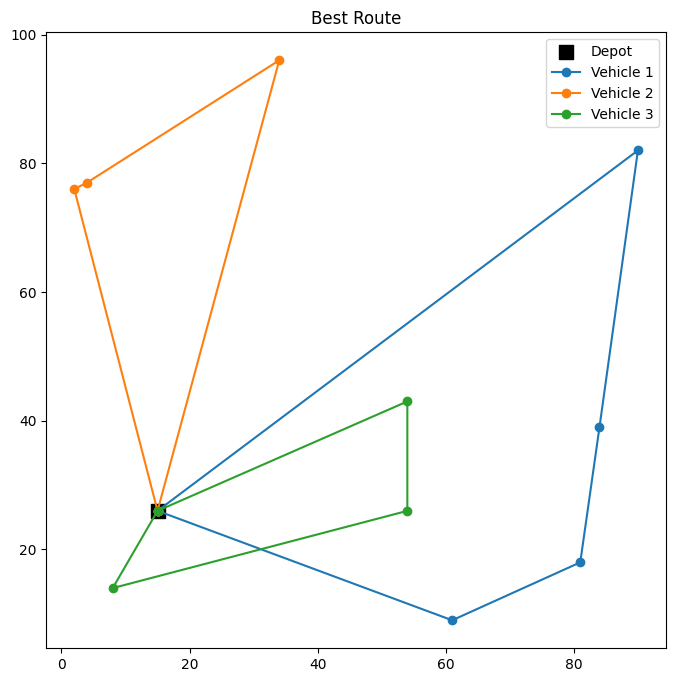

In [49]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)  # Run the genetic algorithm
    return pop, stats, hof
if __name__ == "__main__":
    pop, stats, hof = main()  # Call the main function
# Print the results
    best_individual = hof[0]
    print("Best individual:", best_individual)
    print("Best fitness:", best_individual.fitness.values)

    # Visualize the best route
    plot_routes(best_individual, title="Best Route")